In [77]:
import pandas as pd
import numpy as np
from dtypes import beers_dtype,breweries_dtypes
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [78]:
df = pd.read_csv('../data/beers.csv', dtype=beers_dtype)
df.shape

(2533906, 9)

In [79]:
breweries_df = pd.read_csv('../data/breweries.csv', dtype=breweries_dtypes)
breweries_df.shape

(68989, 8)

In [80]:
# df['country'] = df.brewery_id.map(breweries_df.set_index('id')['country'])
# df.dropna(subset='country')

In [81]:
beers_rus_df = df[df.brewery_id.isin(breweries_df[breweries_df.country == 'Russia'].id)]
beers_usa_df = df[df.brewery_id.isin(breweries_df[breweries_df.country == 'United States'].id)]
beers_germany_df = df[df.brewery_id.isin(breweries_df[breweries_df.country == 'Germany'].id)]
beers_belgium_df = df[df.brewery_id.isin(breweries_df[breweries_df.country == 'Belgium'].id)]
beers_japan_df = df[df.brewery_id.isin(breweries_df[breweries_df.country == 'Japan'].id)]
print('Russia: ', beers_rus_df.shape)
print('USA: ', beers_usa_df.shape)
print('Germany: ', beers_germany_df.shape)
print('Belgium: ', beers_belgium_df.shape)
print('Japan: ', beers_japan_df.shape)

Russia:  (49476, 9)
USA:  (1497342, 9)
Germany:  (52784, 9)
Belgium:  (32724, 9)
Japan:  (32667, 9)


## Характеристики пива

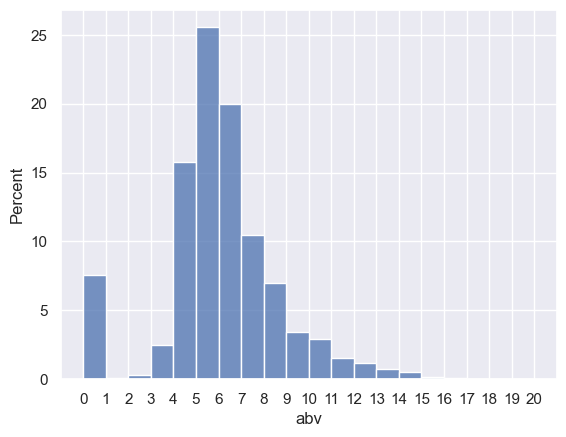

In [82]:
bin_range = [*range(0,21,1)]
ax = sns.histplot(df.abv, stat='percent', bins=bin_range)
ax.set(xticks=bin_range)
plt.show()

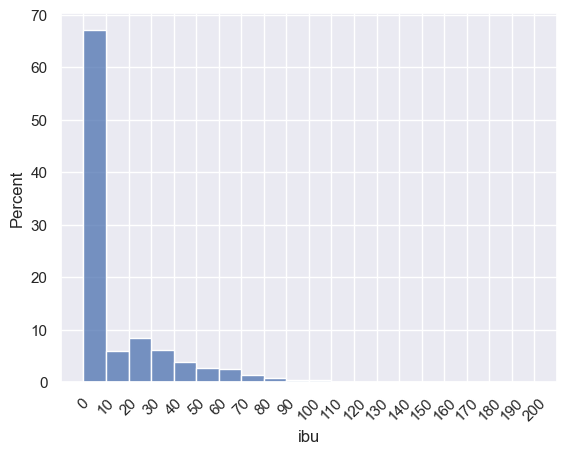

In [83]:
bin_range = [*range(0,210,10)]
# ax = df.ibu.hist(bins=bin_range);
# ax.set(xticks=bin_range);
# ax.tick_params(axis='x', rotation=45)

ax = sns.histplot(df.ibu, stat='percent', bins=bin_range)
ax.set(xticks=bin_range)
ax.tick_params(axis='x', rotation=45)
plt.show()

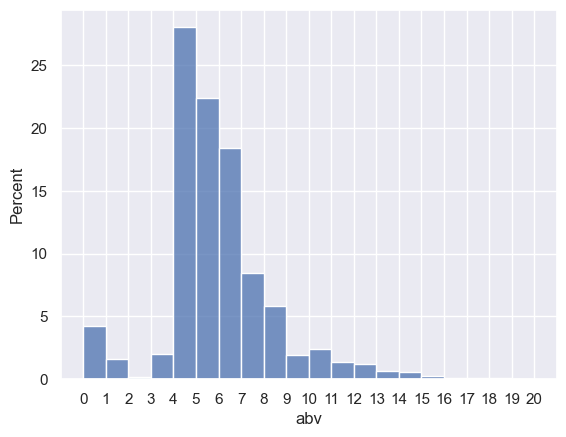

In [84]:
bin_range = [*range(0,21,1)]
# ax = beers_rus_df.abv.hist(bins=bin_range);
# ax.set(xticks=bin_range);

ax = sns.histplot(beers_rus_df.abv, stat='percent', bins=bin_range)
ax.set(xticks=bin_range)
plt.show()

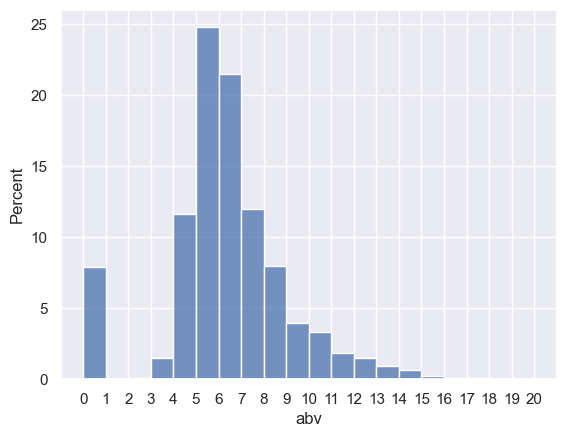

In [85]:
bin_range = [*range(0,21,1)]
# ax = beers_usa_df.abv.hist(bins=bin_range);
# ax.set(xticks=bin_range);

ax = sns.histplot(beers_usa_df.abv, stat='percent', bins=bin_range)
ax.set(xticks=bin_range)
plt.show()

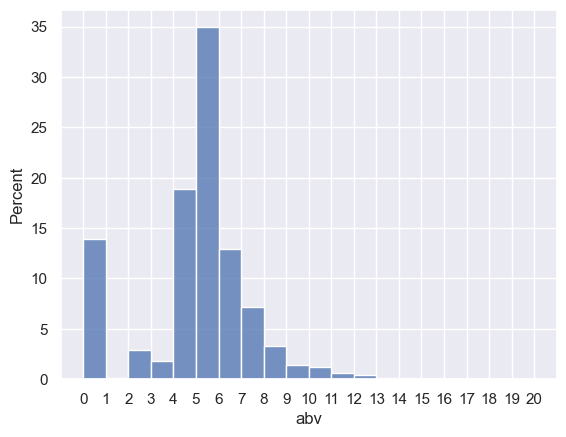

In [86]:
bin_range = [*range(0,21,1)]
# ax = beers_germany_df.abv.hist(bins=bin_range);
# ax.set(xticks=bin_range);

ax = sns.histplot(beers_germany_df.abv, stat='percent', bins=bin_range)
ax.set(xticks=bin_range)
plt.show()

### Рейтинг

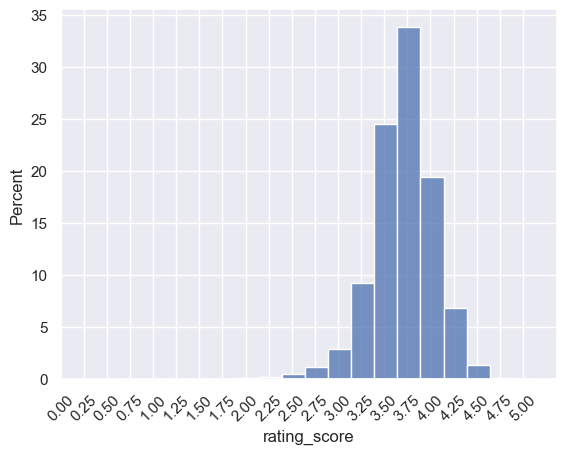

In [87]:
ax = sns.histplot(df[df.rating_score > 0].rating_score, stat='percent', binwidth=0.25);
ax.set(xticks=np.arange(0,5.25,0.25))
ax.tick_params(axis='x', rotation=45)
plt.show()

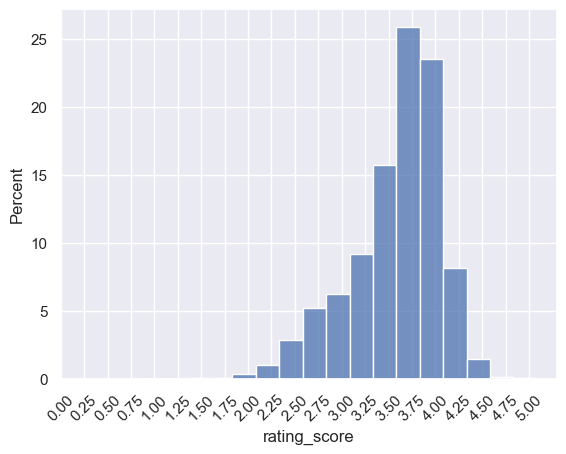

In [88]:
ax = sns.histplot(beers_rus_df[beers_rus_df.rating_score > 0].rating_score, stat='percent', binwidth=0.25);
ax.set(xticks=np.arange(0,5.25,0.25))
ax.tick_params(axis='x', rotation=45)
plt.show()

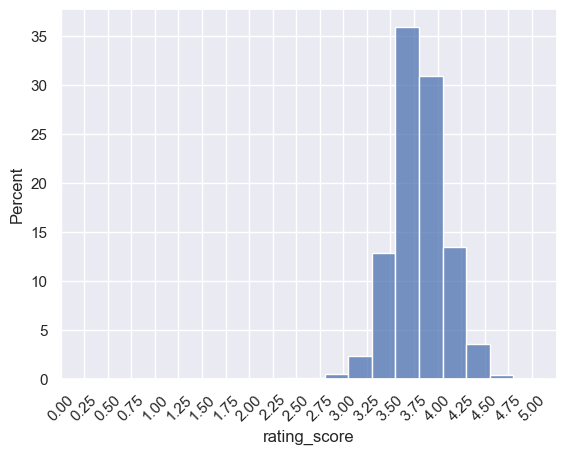

In [89]:
ax = sns.histplot(beers_usa_df[beers_usa_df.rating_score > 0].rating_score, stat='percent', binwidth=0.25);
ax.set(xticks=np.arange(0,5.25,0.25))
ax.tick_params(axis='x', rotation=45)
plt.show()

### Выводы
- Российское пиво в среднем менее крепкое, чем американское (как видно далее, во многом за счет лагеров)
- Среди российского пива меньше безалкогольных наименований (менее 5 процентов против общемировой доли в районе 7.5%)
- Крепость немецкого пива очень редко превышает 10 градусов - вероятно, барливайны не распространены
- У пива, сваренного в России, больше разброс оценок ниже 3.5 (как видно далее, во многом за счет лагеров)
---
- У российского пива есть сегмент с крепостью от 1 до 2 градусов - вероятно, это квас (проверить)

## Самые популярные стили пива

### Вне зависимости от типа пивоварни

In [90]:
TOP_N_STYLES = 10

In [91]:
df['style'].value_counts()[:TOP_N_STYLES]

IPA - American               201685
IPA - New England / Hazy     122982
Pale Ale - American          105138
Farmhouse Ale - Saison        77127
Sour - Fruited                76885
IPA - Imperial / Double       73022
Stout - Imperial / Double     65750
Sour - Other                  52990
Blonde Ale                    49024
IPA - Session                 38036
Name: style, dtype: int64

In [92]:
beers_rus_df['style'].value_counts()[:TOP_N_STYLES]

Lager - Pale                4672
IPA - American              2186
Sour - Fruited              1545
Pale Ale - American         1530
IPA - New England / Hazy    1277
Wheat Beer - Hefeweizen     1230
Fruit Beer                  1171
IPA - Imperial / Double     1039
Sour - Other Gose            967
Stout - Russian Imperial     932
Name: style, dtype: int64

In [93]:
beers_rus_df['style'].value_counts()[:20]

Lager - Pale                      4672
IPA - American                    2186
Sour - Fruited                    1545
Pale Ale - American               1530
IPA - New England / Hazy          1277
Wheat Beer - Hefeweizen           1230
Fruit Beer                        1171
IPA - Imperial / Double           1039
Sour - Other Gose                  967
Stout - Russian Imperial           932
Kvass                              895
Lager - Dark                       894
Wheat Beer - Witbier / Blanche     807
Cider - Other Fruit                769
Mead - Melomel                     761
Mead - Other                       708
Sour - Fruited Gose                694
Stout - Milk / Sweet               688
Farmhouse Ale - Saison             675
Lager - Helles                     673
Name: style, dtype: int64

In [94]:
beers_usa_df['style'].value_counts()[:TOP_N_STYLES]

IPA - American               141268
IPA - New England / Hazy      83528
Pale Ale - American           61505
Sour - Fruited                53030
IPA - Imperial / Double       52040
Farmhouse Ale - Saison        49766
Stout - Imperial / Double     48313
Sour - Other                  36673
Blonde Ale                    27690
Hard Seltzer                  24916
Name: style, dtype: int64

In [95]:
beers_germany_df['style'].value_counts()[:TOP_N_STYLES]

Lager - Helles                 4112
Pilsner - German               3669
Wheat Beer - Hefeweizen        2723
Kellerbier / Zwickelbier       2088
Bock - Single / Traditional    1548
Shandy / Radler                1532
Festbier                       1508
Märzen                         1335
IPA - American                 1260
Bock - Doppelbock              1249
Name: style, dtype: int64

### Мaкропивоварни

In [96]:
beers_rus_df[beers_rus_df.brewery_id.isin(breweries_df[breweries_df.type == 'Macro Brewery'].id)]['style'].value_counts()[:TOP_N_STYLES]

Lager - Pale                      427
Lager - Strong                     75
Non-Alcoholic Beer - Lager         47
Kvass                              46
Fruit Beer                         46
Shandy / Radler                    45
Lager - Dark                       29
Wheat Beer - Hefeweizen            25
Kellerbier / Zwickelbier           23
Wheat Beer - Witbier / Blanche     18
Name: style, dtype: int64

In [97]:
beers_usa_df[beers_usa_df.brewery_id.isin(breweries_df[breweries_df.type == 'Macro Brewery'].id)]['style'].value_counts()[:TOP_N_STYLES]

IPA - American               2163
Pale Ale - American          1010
IPA - Imperial / Double       744
Hard Seltzer                  726
Sour - Other                  679
Farmhouse Ale - Saison        676
Stout - Imperial / Double     671
IPA - New England / Hazy      647
Fruit Beer                    442
Lager - American              432
Name: style, dtype: int64

In [98]:
beers_germany_df[beers_germany_df.brewery_id.isin(breweries_df[breweries_df.type == 'Macro Brewery'].id)]['style'].value_counts()[:TOP_N_STYLES]

Pilsner - German               294
Wheat Beer - Hefeweizen        224
Shandy / Radler                222
Lager - Helles                 145
Non-Alcoholic Beer - Other     134
Lager - Pale                   102
Märzen                          87
Lager - Dortmunder / Export     85
Festbier                        84
Kellerbier / Zwickelbier        81
Name: style, dtype: int64

In [99]:
beers_belgium_df[beers_belgium_df.brewery_id.isin(breweries_df[breweries_df.type == 'Macro Brewery'].id)]['style'].value_counts()[:TOP_N_STYLES]

Belgian Blonde                    192
Belgian Tripel                    132
Belgian Strong Golden Ale         125
Sour - Flanders Red Ale           110
Wheat Beer - Witbier / Blanche     85
Lager - Pale                       82
Fruit Beer                         68
Belgian Dubbel                     68
Belgian Strong Dark Ale            64
Winter Ale                         62
Name: style, dtype: int64

### Микропивоварни

In [100]:
beers_rus_df[beers_rus_df.brewery_id.isin(breweries_df[breweries_df.type == 'Micro Brewery'].id)]['style'].value_counts()[:TOP_N_STYLES]

Lager - Pale                2652
IPA - American              1258
Sour - Fruited               924
IPA - New England / Hazy     846
Pale Ale - American          831
Fruit Beer                   694
IPA - Imperial / Double      645
Wheat Beer - Hefeweizen      600
Stout - Russian Imperial     532
Lager - Dark                 509
Name: style, dtype: int64

In [101]:
beers_usa_df[beers_usa_df.brewery_id.isin(breweries_df[breweries_df.type == 'Micro Brewery'].id)]['style'].value_counts()[:TOP_N_STYLES]

IPA - American               82273
IPA - New England / Hazy     51944
Pale Ale - American          35953
Sour - Fruited               34800
Farmhouse Ale - Saison       31121
IPA - Imperial / Double      30420
Stout - Imperial / Double    29586
Sour - Other                 23589
Blonde Ale                   16592
Hard Seltzer                 15122
Name: style, dtype: int64

In [102]:
beers_germany_df[beers_germany_df.brewery_id.isin(breweries_df[breweries_df.type == 'Micro Brewery'].id)]['style'].value_counts()[:TOP_N_STYLES]

Lager - Helles                       2430
Pilsner - German                     1928
Wheat Beer - Hefeweizen              1431
Kellerbier / Zwickelbier             1223
Festbier                              938
Bock - Single / Traditional           935
Shandy / Radler                       917
Märzen                                802
Bock - Doppelbock                     768
Bock - Hell / Maibock / Lentebock     677
Name: style, dtype: int64

In [103]:
beers_belgium_df[beers_belgium_df.brewery_id.isin(breweries_df[breweries_df.type == 'Micro Brewery'].id)]['style'].value_counts()[:TOP_N_STYLES]

Belgian Blonde               2358
Belgian Tripel               2029
Belgian Strong Golden Ale     945
Farmhouse Ale - Saison        791
Belgian Strong Dark Ale       735
Lambic - Gueuze               650
Belgian Dubbel                529
Lambic - Fruit                524
Belgian Quadrupel             514
IPA - Belgian                 502
Name: style, dtype: int64

### Выводы
Сильна

## Зависимость оценок пива от стиля

In [104]:
pd.options.mode.chained_assignment = None
def overall_score_by_style(df):
	value_count = df['style'].value_counts()[:TOP_N_STYLES].index;
	top_styles_df = df[df['style'].isin(value_count) & df.rating_score != 0]
	top_styles_df['style'] = top_styles_df['style'].astype('object')

	fig, ax = plt.subplots(figsize=(15,5))
	sns.boxplot(x='style', y='rating_score', data=top_styles_df, ax=ax, order=value_count)
	plt.xlabel('Style')
	plt.ylabel('Rating Score')
	ax.tick_params(axis='x', rotation=45)
	plt.show()

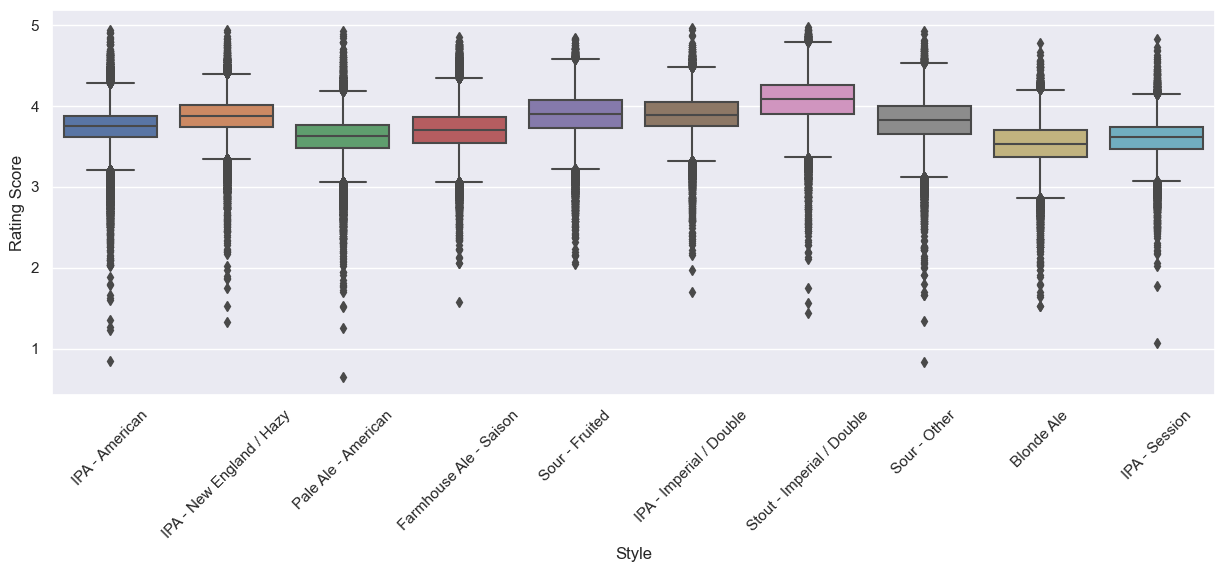

In [105]:
overall_score_by_style(df)

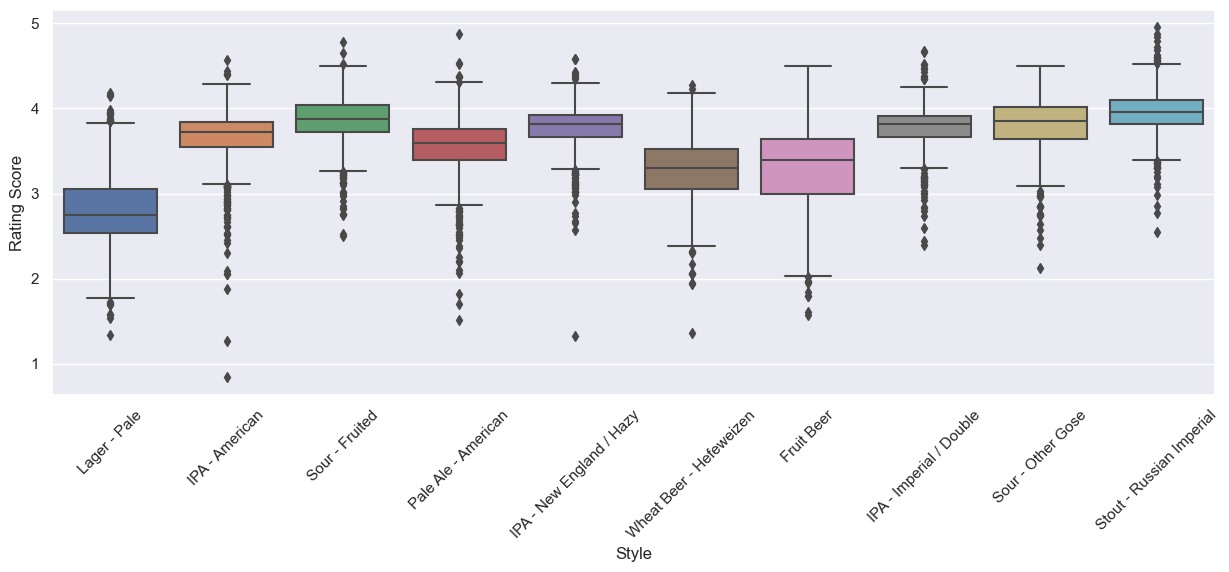

In [106]:
overall_score_by_style(beers_rus_df)

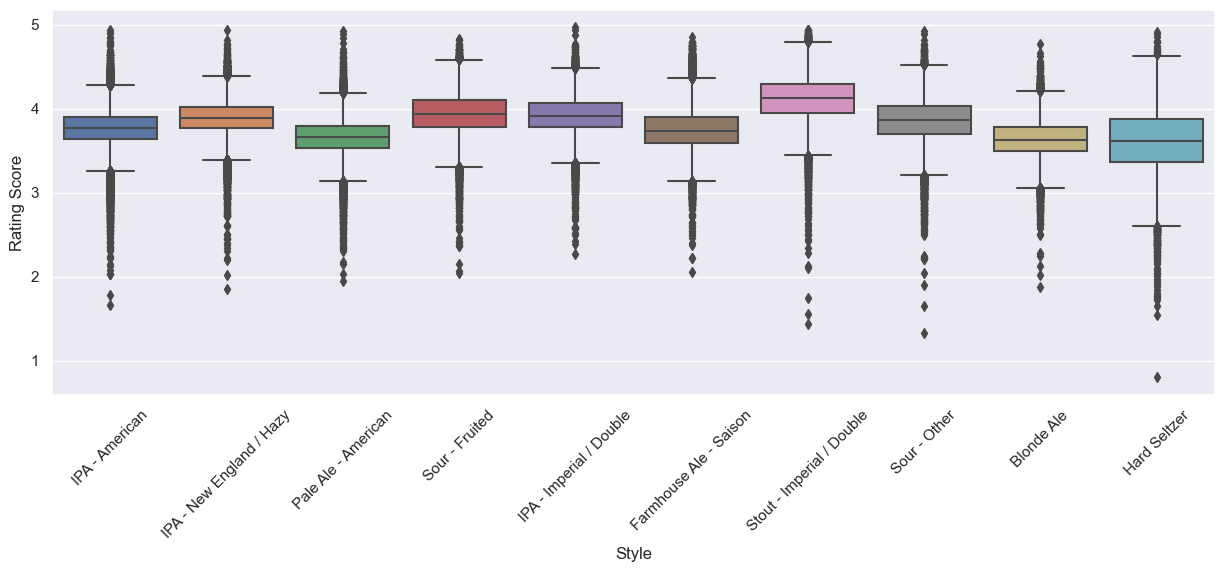

In [107]:
overall_score_by_style(beers_usa_df)

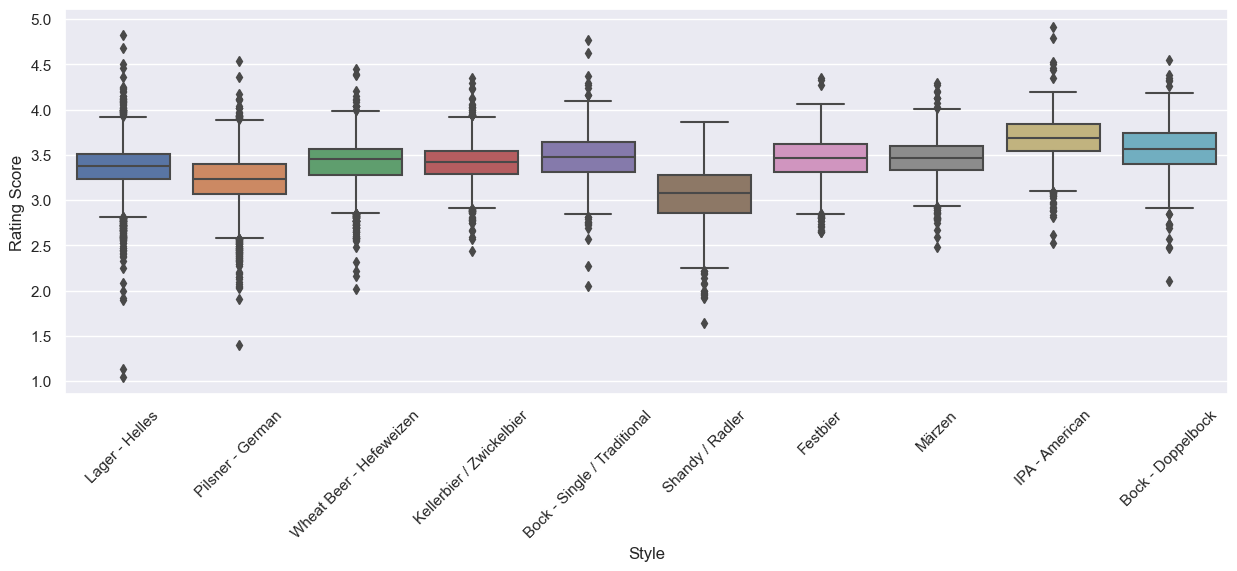

In [108]:
overall_score_by_style(beers_germany_df)

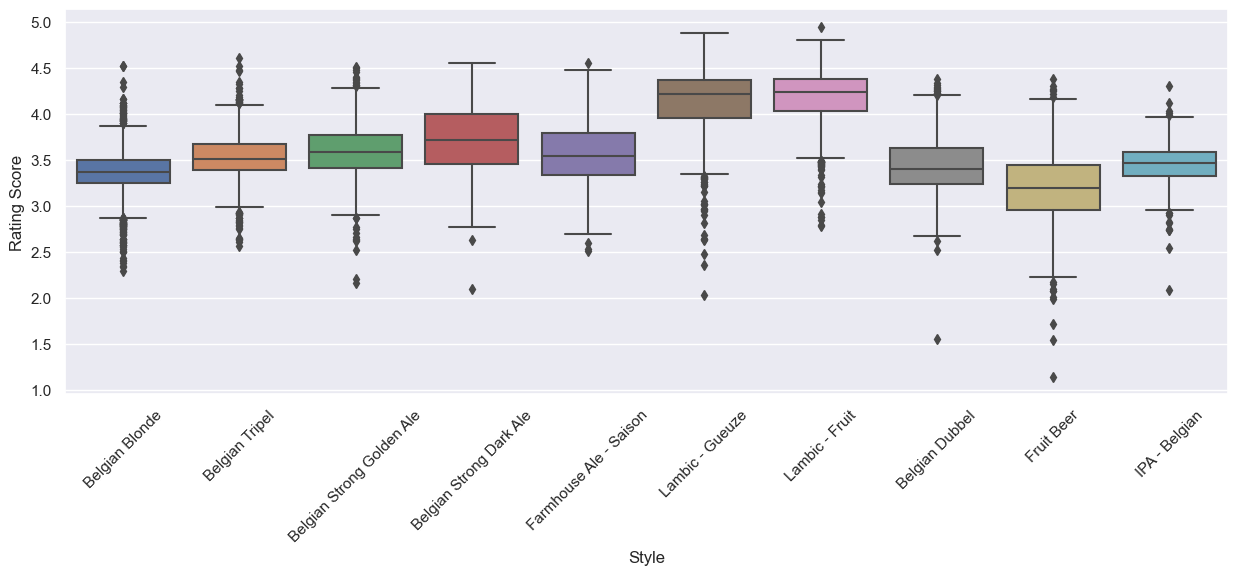

In [109]:
overall_score_by_style(beers_belgium_df)

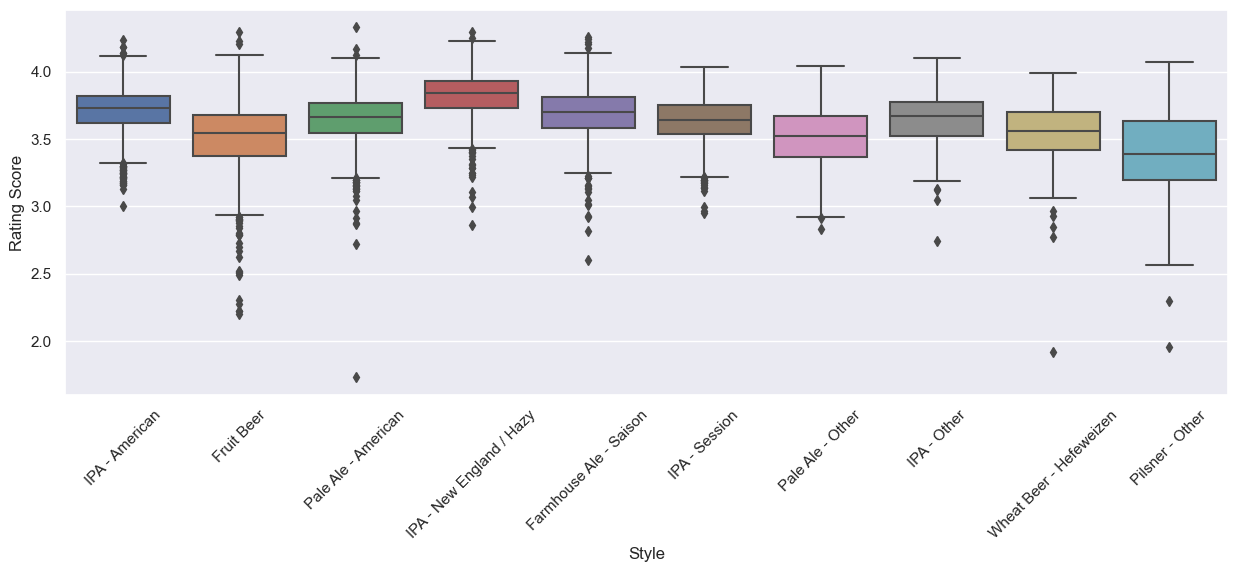

In [110]:
overall_score_by_style(beers_japan_df)

### Выводы
- Несмотря на то, что Untappd – платформа прежде всего для искушенных потребителей, обычный лагер лидирует среди стилей на российском рынке – его варят больше всего и оценивают ниже всех популярных стилей
- Стауты – стиль с самой высокой оценкой, и любовь пользователей к этому стилю не ограничивается США
- Немецкое пивоварение консервативно, и самый высоко оцениваемый стиль – American IPA – оказался единственным, чье происхождение – не Германия
- Бельгийский рынок очень самобытен, и даже IPA среди лидеров имеет бельгийское происхождение
- Большой разброс оценок наблюдается у стиля Fruit Beer
- Чем пиво "проще", тем ниже у него средняя оценка на Untappd
- Рынки пивоварения не подвержены глобализации и влиянию трендов американского пивоварения полностью – благодаря статистике отчетливо видны региональные особенности пивоварения

In [120]:
def style_counts(df, N_TOP_STYLES=20):
	sums_of_styles = df.groupby('style', as_index=False)['rating_count'].sum()
	beer_counts = df['style'].value_counts()
	sums_of_styles['beer_count'] = sums_of_styles['style'].map(beer_counts)
	sums_of_styles['checkins_per_style'] = (sums_of_styles['rating_count'] / sums_of_styles['beer_count']).round()
	sums_of_styles = sums_of_styles.sort_values('rating_count', ascending=False)
	print(f'avg_checkins_per_style mean of top {N_TOP_STYLES} styles:', sums_of_styles[:N_TOP_STYLES].checkins_per_style.mean().round())
	sums_of_styles.to_csv('sums_of_styles.csv', index=False)
	return sums_of_styles[:N_TOP_STYLES]

In [112]:
style_counts(beers_rus_df)

avg_checkins_per_style mean of top 20 styles: 334.0


,style,rating_count,beer_count,checkins_per_style
207,Sour - Fruited,576420,1545,373.0
81,IPA - American,538274,2186,246.0
96,IPA - New England / Hazy,535303,1277,419.0
94,IPA - Imperial / Double New England / Hazy,444464,569,781.0
125,Lager - Pale,406151,4672,87.0
211,Sour - Other Gose,401146,967,415.0
212,Sour - Smoothie / Pastry,345648,632,547.0
91,IPA - Imperial / Double,334063,1039,322.0
209,Sour - Fruited Gose,278804,694,402.0
164,Pale Ale - American,251634,1530,164.0


In [113]:
style_counts(beers_usa_df)

avg_checkins_per_style mean of top 20 styles: 447.0


,style,rating_count,beer_count,checkins_per_style
81,IPA - American,77888206,141268,551.0
91,IPA - Imperial / Double,42652981,52040,820.0
96,IPA - New England / Hazy,29941906,83528,358.0
164,Pale Ale - American,24266010,61505,395.0
221,Stout - Imperial / Double,21147130,48313,438.0
94,IPA - Imperial / Double New England / Hazy,13415597,22402,599.0
50,Farmhouse Ale - Saison,13109668,49766,263.0
207,Sour - Fruited,11359488,53030,214.0
102,IPA - Session,8856009,16478,537.0
189,Red Ale - American Amber / Red,8123953,15578,522.0


In [121]:
pd.options.mode.chained_assignment = None
def overall_score_by_style_by_total_checkins(df):
	sums_of_styles = style_counts(df, 10)
	value_count = sums_of_styles['style'];
	top_styles_df = df[df['style'].isin(value_count) & df.rating_score != 0]
	top_styles_df['style'] = top_styles_df['style'].astype('object')

	fig, ax = plt.subplots(figsize=(15,5))
	sns.boxplot(x='style', y='rating_score', data=top_styles_df, ax=ax, order=value_count)
	plt.xlabel('Style')
	plt.ylabel('Rating Score')
	ax.tick_params(axis='x', rotation=45)
	plt.show()

avg_checkins_per_style mean of top 10 styles: 446.0


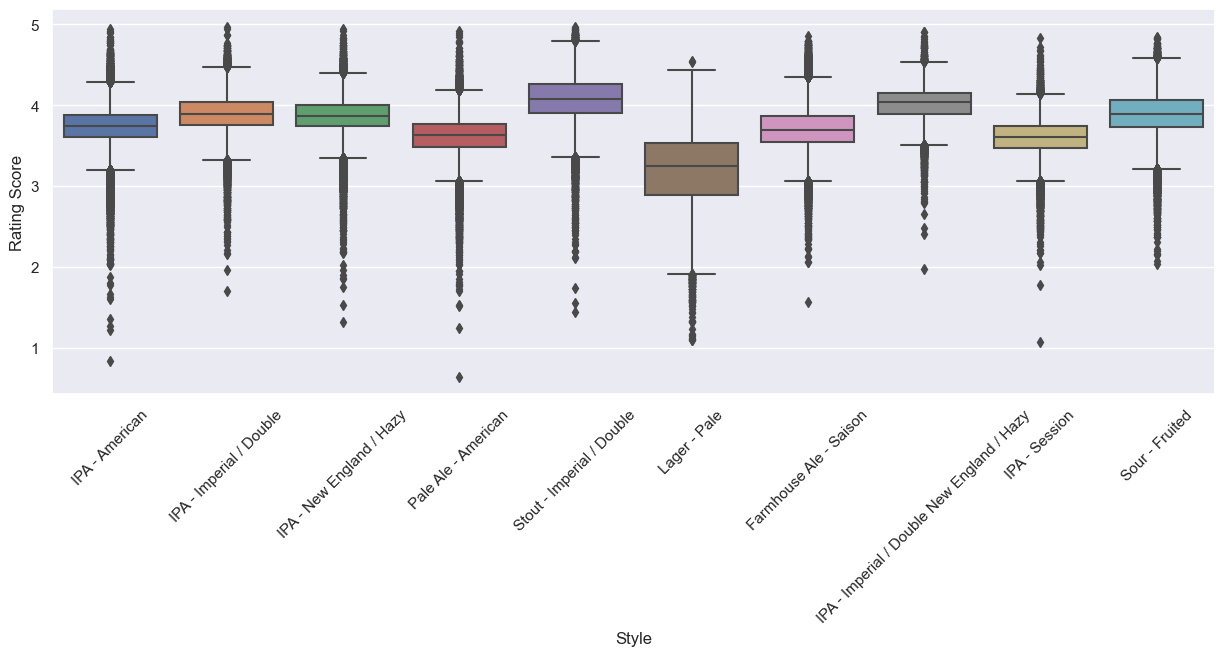

In [125]:
overall_score_by_style_by_total_checkins(df)

avg_checkins_per_style mean of top 10 styles: 376.0


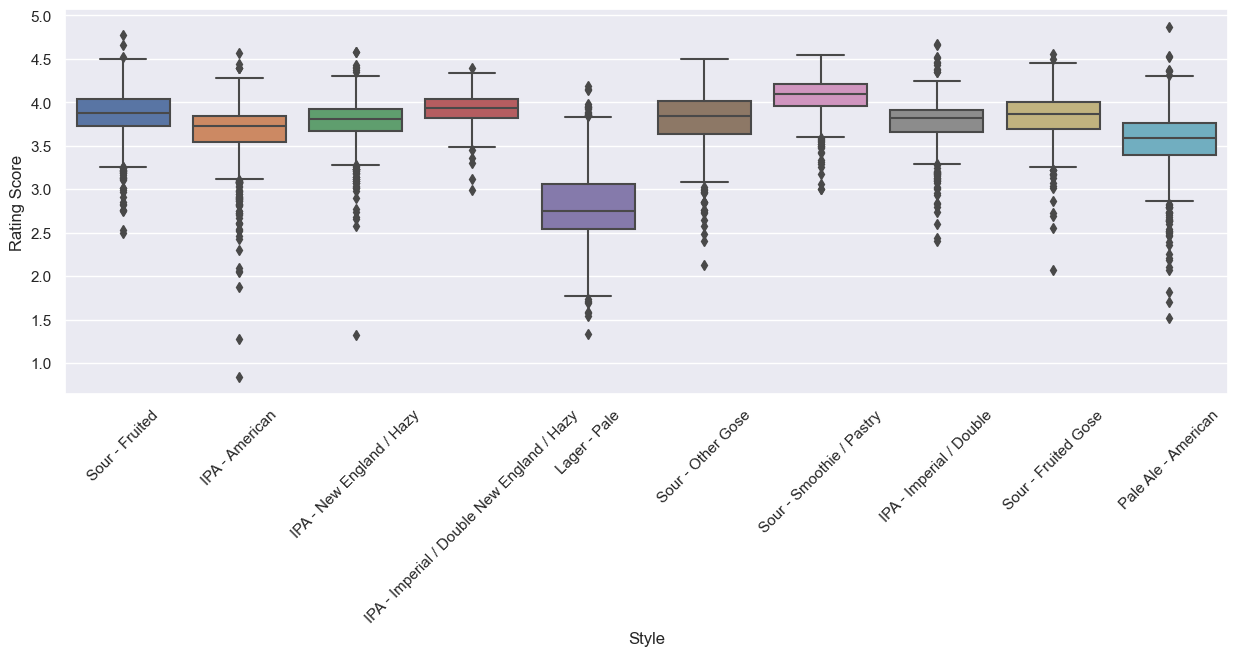

In [122]:
overall_score_by_style_by_total_checkins(beers_rus_df)

avg_checkins_per_style mean of top 10 styles: 470.0


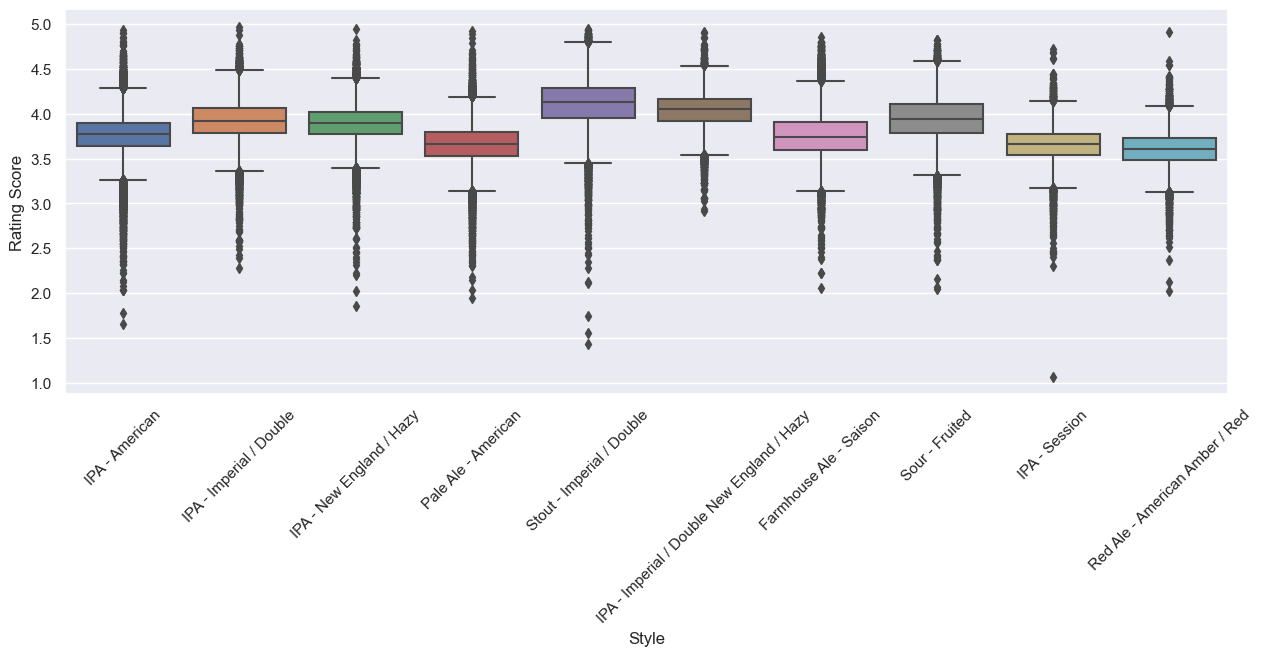

In [124]:
overall_score_by_style_by_total_checkins(beers_usa_df)